<a href="https://colab.research.google.com/github/Aipakazuma/meetup037/blob/master/001_Keras%E3%83%81%E3%83%A5%E3%83%BC%E3%83%88%E3%83%AA%E3%82%A2%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras チュートリアル


## やること

* カーネルをGPUに変更
* Kerasをimport
* cifar10のデータを使う
* 簡単なモデルを作ってみて学習してみる
* 学習した結果を確認してみる
* モデルの保存

## カーネルをGPUに変更

ツールバーの`ランタイム` -> `ランタイムのタイプを変更`

表示されたポップアップの`ハードウェア アクセラレーション`をGPUに変更して保存してください

## モジュールのimport

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import to_categorical
from keras.datasets import cifar10


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## cifar10のデータをロード

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

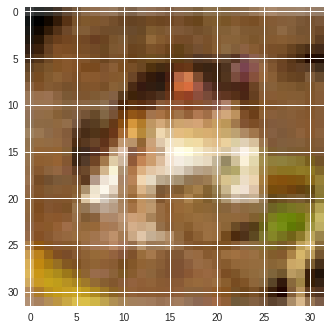

In [8]:
# 画像の確認
plt.imshow(X_train[0])
plt.show()

In [9]:
y_train[0]

array([6], dtype=uint8)

### ラベル

* 0 airplane										
* 1 automobile										
* 2 bird										
* 3 cat										
* 4 deer										
* 5 dog										
* 6 frog										
* 7 horse										
* 8 ship										
* 9 truck


6はカエル

## 前処理

In [0]:
# 画像を0-1の範囲で正規化
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 正解ラベルをOne-Hot表現に変換
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
# [1] -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]というデータに変更
y_train.shape

(50000, 10)

## モデル構築

In [0]:
# 簡単な3層の全結合層でモデルを組んでみる
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

# モデルを利用するにはcompileしてあげる必要がある
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# 組んだモデルの構造を確認できます
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                98336     
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total para

* Output Shapeはある層の出力したときの次元（そのまま）
  * 最初の次元がNoneなのはデータの数を可変にするため
* Paramは重みのパラメータ数

## 学習

In [0]:
# 訓練データ全体を使って学習する回数
epochs = 20

# 一度に学習するデータの数
batch_size = 128

今回の訓練データは50000件なので

1 epochでは、50000 / 128 = 391回勾配の更新が実行される。

ディープラーニングではパラメータ数が多いため、何度か同じ訓練データを用いて学習する必要があるが、やりすぎると過学習してしまう

In [35]:
# モデルのfitting
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1)  # validation_split -> 訓練の最後の10%を検証データとする

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 4s 79us/step - loss: 2.1618 - acc: 0.1930 - val_loss: 2.0484 - val_acc: 0.2466
Epoch 2/20
45000/45000 [==============================] - 4s 89us/step - loss: 1.9800 - acc: 0.2702 - val_loss: 1.9518 - val_acc: 0.2748
Epoch 3/20
45000/45000 [==============================] - 4s 89us/step - loss: 1.9284 - acc: 0.2947 - val_loss: 1.9216 - val_acc: 0.3004
Epoch 4/20
45000/45000 [==============================] - 4s 88us/step - loss: 1.9012 - acc: 0.3152 - val_loss: 1.9028 - val_acc: 0.3132
Epoch 5/20
45000/45000 [==============================] - 4s 89us/step - loss: 1.8794 - acc: 0.3233 - val_loss: 1.8795 - val_acc: 0.3290
Epoch 6/20
45000/45000 [==============================] - 4s 84us/step - loss: 1.8608 - acc: 0.3333 - val_loss: 1.8620 - val_acc: 0.3350
Epoch 7/20
45000/45000 [==============================] - 3s 76us/step - loss: 1.8434 - acc: 0.3413 - val_loss: 1.8466 - val_acc:

## 結果の確認

### 精度とlossの確認

In [37]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

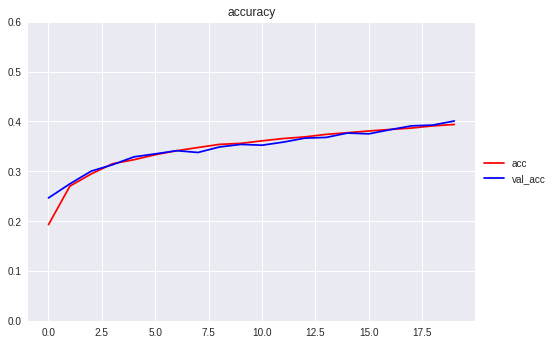

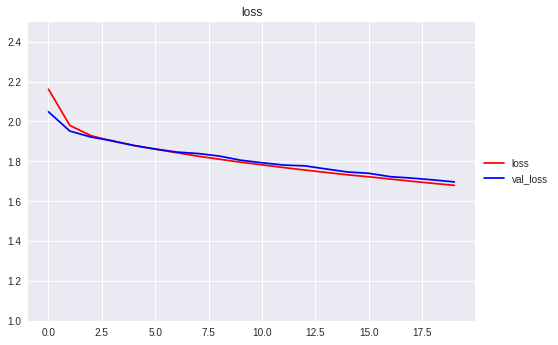

In [40]:
x = range(epochs)
plt.plot(x, history.history['acc'], label='acc', color='r')
plt.plot(x, history.history['val_acc'], label='val_acc', color='b')
plt.ylim(0.0, 0.6)
plt.title('accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history.history['loss'], label='loss', color='r')
plt.plot(x, history.history['val_loss'], label='val_loss', color='b')
plt.title('loss')
plt.ylim(1.0, 2.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

ここから読み取れること

* 訓練と検証データの差が小さいので、過学習していないようだ
* epochsを増やせば精度向上はいけそう
* ただ、伸びがいまいちなのでモデル構造変更したほうが良さそう

### テストデータを評価

In [42]:
# テストデータの精度を確認する
loss, acc = model.evaluate(X_test, y_test)
print('test loss: {}, test acc: {}'.format(loss, acc))

10000/10000 [==============================] - 1s 106us/step
test loss: 1.6736831453323364, test acc: 0.3996


### 間違えたデータを確認してみる

それぞれのラベル毎に正解・不正解の内訳を確認してみる

scikit-learnの関数を使って行う(Kerasでできるのであればそれでも良い)

In [0]:
from sklearn.metrics import classification_report

In [48]:
# あるデータを評価したい(分類)場合は、predict関数を利用する
# 渡す場合は、学習したデータの次元と同じにしなければならない
input_data = np.array([X_train[0]])
model.predict(input_data)

array([[0.00737082, 0.02575703, 0.09344425, 0.10146618, 0.09591059,
        0.06780282, 0.5546511 , 0.03855815, 0.00247092, 0.01256814]],
      dtype=float32)

np.array([10])のデータで返ってくる。入っている値は確率値。一番高い値が予測したクラスとなる.

In [54]:
# 確率なので全部足すと1.0になる
model.predict(input_data).sum(axis=1)

array([0.99999994], dtype=float32)

(ならなかった)

Webサービスに組み込むなどしたい場合はこの関数を利用すればよい

In [55]:
# 一番大きい確率の要素番号(クラス)を取得する場合は、np.argmax()を使えば良い
model.predict(input_data).argmax(axis=1)

array([6])

本題に戻る

In [0]:
# on-hot形式なので元に戻す
_y_train = y_train.argmax(axis=-1)
_y_test = y_test.argmax(axis=-1)

In [0]:
label_names = """airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck""".split('\n')

In [62]:
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [64]:
# (正解データ, 予測結果, target_name=['ラベル名'])で渡す
# target_nameは必須ではない。が見やすいのでオススメ
r = classification_report(_y_train, model.predict(X_train).argmax(axis=1), target_names=label_names)
print(r)

             precision    recall  f1-score   support

   airplane       0.46      0.46      0.46      5000
 automobile       0.45      0.49      0.47      5000
       bird       0.27      0.17      0.21      5000
        cat       0.29      0.25      0.26      5000
       deer       0.31      0.27      0.29      5000
        dog       0.39      0.30      0.34      5000
       frog       0.38      0.49      0.43      5000
      horse       0.39      0.49      0.43      5000
       ship       0.53      0.53      0.53      5000
      truck       0.43      0.53      0.47      5000

avg / total       0.39      0.40      0.39     50000



In [65]:
# テストデータ
r = classification_report(_y_test, model.predict(X_test).argmax(axis=1), target_names=label_names)
print(r)

             precision    recall  f1-score   support

   airplane       0.48      0.49      0.49      1000
 automobile       0.46      0.48      0.47      1000
       bird       0.27      0.17      0.21      1000
        cat       0.28      0.26      0.27      1000
       deer       0.32      0.27      0.29      1000
        dog       0.39      0.29      0.33      1000
       frog       0.39      0.52      0.44      1000
      horse       0.38      0.48      0.42      1000
       ship       0.51      0.53      0.52      1000
      truck       0.44      0.51      0.47      1000

avg / total       0.39      0.40      0.39     10000



* precision 適合率のこと。予測を正と判断した中で、答えも正のもの
* recall 再現率のこと。答えが正の中で、予測が正とされたもの
* f1-score PresicionとRecallの調和平均

## モデルの保存

* 2つやる必要がある
  * 重みの保存
    * hdf5形式で保存
  * モデル構造の保存
    * yamlとjsonがある

In [0]:
!mkdir ./models/

In [0]:
# 重みの保存
model.save_weights('./models/first_model.hdf5')

In [0]:
# モデル構造の保存
# json文字列で取得
model_json = model.to_json()

# あとはpythonのモジュールを使ってjsonファイルで保存する
import json

with open('./models/first_model.json', 'w') as f:
  json.dump(model_json, f)

In [73]:
!ls -lh ./models/

total 412K
-rw-r--r-- 1 root root 407K Dec 11 17:00 first_model.hdf5
-rw-r--r-- 1 root root 2.3K Dec 11 17:00 first_model.json


読み込む時は下記のようにすれば良い

In [0]:
from keras.models import model_from_json

with open('./models/first_model.json', 'r') as f:
  json_string = json.load(f)


model2 = model_from_json(json_string)

In [0]:
model2.load_weights('./models/first_model.hdf5')

In [76]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                98336     
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total para